In [0]:
from __future__ import print_function
!pip install numpy==1.16.1
import numpy as np
import nltk

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN
from keras.datasets import imdb

import matplotlib.pyplot as plt

nltk.download('punkt')

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
max_features = 20000
maxlen = 100  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# restore np.load for future normal usage
np.load = np_load_old

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')



Loading data...
25000 train sequences
25000 test sequences


Pad sequences (samples x time)


W0819 17:02:40.681901 139827507443584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 17:02:40.695306 139827507443584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 17:02:40.697341 139827507443584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0819 17:02:40.803592 139827507443584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0819 17:02:40.825733 139827507443584 deprecation_wrappe

x_train shape: (25000, 100)
x_test shape: (25000, 100)
Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 50)                8950      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 2,569,001
Trainable params: 2,569,001
Non-trainable params: 0
_________________________________________________________________
None
Train...


W0819 17:02:41.098697 139827507443584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 33s 1ms/step - loss: 0.5133 - acc: 0.7454 - val_loss: 0.4411 - val_acc: 0.8072
Epoch 2/15
25000/25000 [==============================] - 32s 1ms/step - loss: 0.2800 - acc: 0.8861 - val_loss: 0.4387 - val_acc: 0.8141
Epoch 3/15
25000/25000 [==============================] - 32s 1ms/step - loss: 0.1327 - acc: 0.9526 - val_loss: 0.5624 - val_acc: 0.7995
Epoch 4/15
25000/25000 [==============================] - 32s 1ms/step - loss: 0.0626 - acc: 0.9790 - val_loss: 0.6808 - val_acc: 0.7898
Epoch 5/15
25000/25000 [==============================] - 32s 1ms/step - loss: 0.0411 - acc: 0.9863 - val_loss: 0.7769 - val_acc: 0.7936
Epoch 6/15
25000/25000 [==============================] - 32s 1ms/step - loss: 0.0490 - acc: 0.9839 - val_loss: 0.8141 - val_acc: 0.7759
Epoch 7/15
25000/25000 [==============================] - 32s 1ms/step - loss: 0.0223 - acc: 0.9931 - val_loss: 1.0117 - val_acc

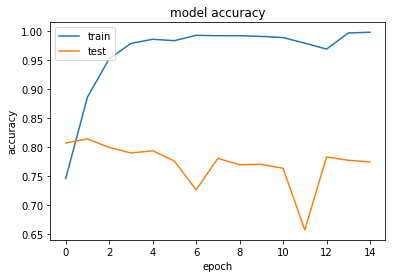

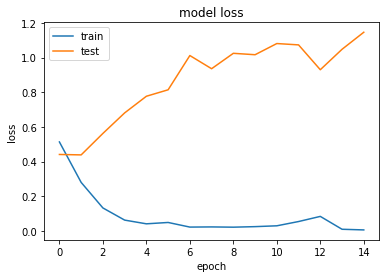

In [0]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(50, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15, 
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from nltk import word_tokenize
from keras.preprocessing import sequence
word2index = imdb.get_word_index()
test=[]
for word in word_tokenize( "good movie"):
     test.append(word2index[word])

test=sequence.pad_sequences([test],maxlen=100)
model.predict(test)

array([[0.99989986]], dtype=float32)